In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio.v3 as iio

In [2]:
# set constants
TRAINING_IMAGES_DIR = 'data/images/TRAIN' # directory/path to training images
TRAINING_LABELS_PATH = 'data/labels.csv' # path to training labels csv
IMAGE_HEIGHT = 240 #pixels
IMAGE_WIDTH = 320 #pixels

# dictionaries mapping each label to an integer representation (or vice versa)
REP_TO_LABELS = {0: 'EOSINOPHIL', 1: 'LYMPHOCYTE', 2: 'MONOCYTE', 3: 'NEUTROPHIL'}
LABELS_TO_REP = {v: k for k, v in REP_TO_LABELS.items()}

In [3]:
# create empty lists to store training data
train_images_list = [] # ndarrays for the training images
train_images_names = [] # the filename of the image
train_labels = [] # the true label for the image

# read in training images:
for dirpath, dirnames, filenames in os.walk(TRAINING_IMAGES_DIR):
        for file in filenames:
            train_images_list.append(iio.imread(uri = os.path.join(dirpath, file)).astype(np.uint8))
            train_images_names.append(file)
            train_labels.append(LABELS_TO_REP[Path(dirpath).stem])

# stack all of the training images into one array
train_images = np.stack(train_images_list, axis=0, dtype=np.uint8)

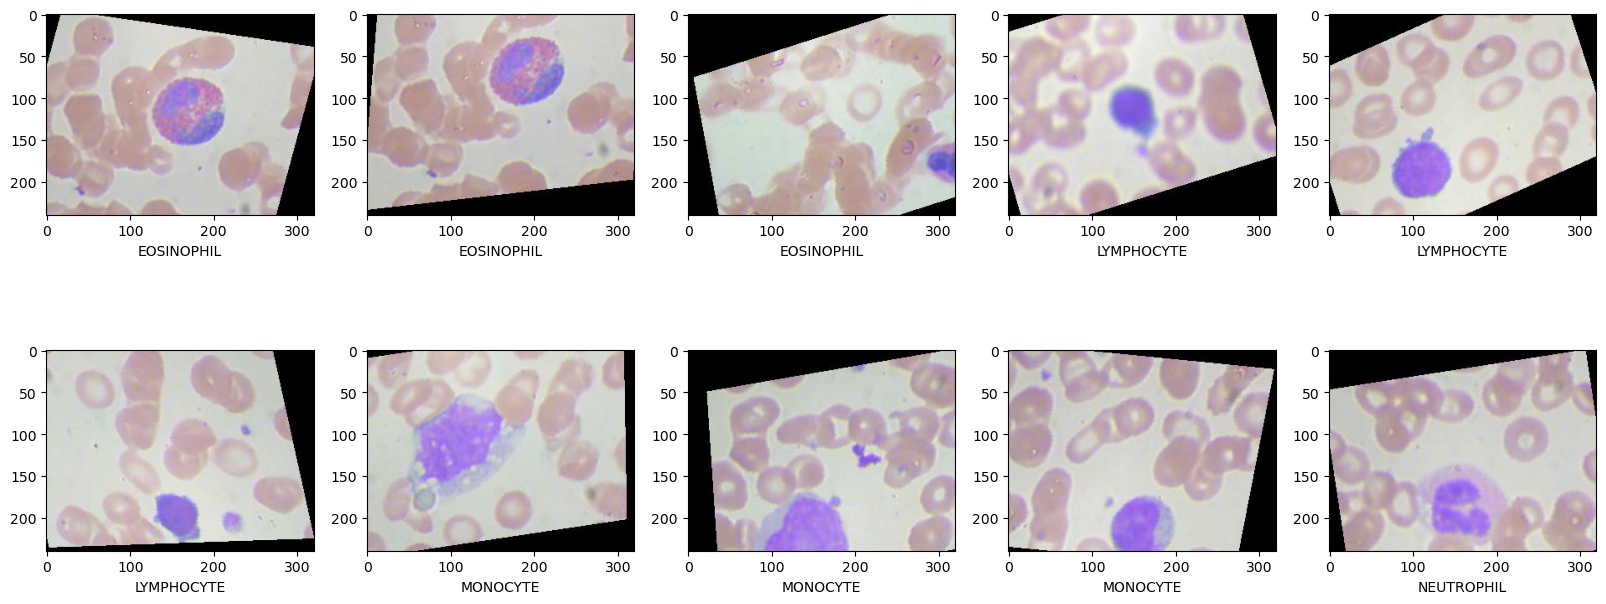

In [4]:
# display 10 cell images
fig, axs = plt.subplots(2, 5, figsize=(20,8))
count = 0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(train_images[850*count,:,:,:].reshape([IMAGE_HEIGHT,IMAGE_WIDTH,3]))
        # axs[i,j].axis("off")
        axs[i,j].set_xlabel(REP_TO_LABELS[train_labels[850*count]])
        count+=1
plt.show()